In [84]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [85]:
np.random.seed(42)

In [86]:
X_inliers = 0.3 * np.random.randn(2000, 2)
X_inliers.shape

(2000, 2)

In [87]:
X_outliers = np.random.uniform(low=-4, high=0, size=(200, 2))
X_outliers.shape

(200, 2)

In [88]:
X = np.vstack([X_inliers, X_outliers])
X.shape

(2200, 2)

In [89]:
-len(X_outliers)

-200

In [90]:
y = np.zeros(len(X), dtype=int)
num_outliers = len(X_outliers)
y[-num_outliers:] = 1
y.shape

(2200,)

In [91]:
Counter(y)

Counter({0: 2000, 1: 200})

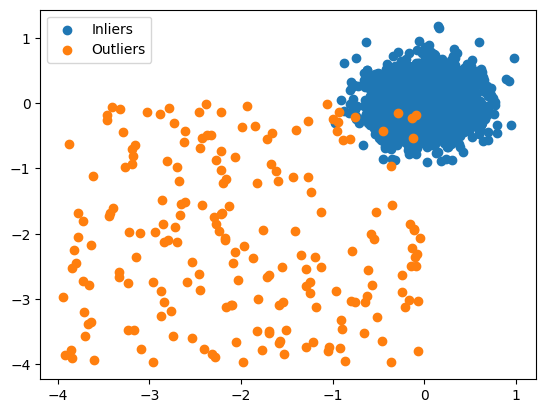

In [92]:
plt.scatter(X_inliers[:, 0], X_inliers[:, 1], label='Inliers')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], label='Outliers')
plt.legend()

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((1760, 2), (440, 2))

In [94]:
Counter(y_train)

Counter({0: 1600, 1: 160})

In [95]:
np.where(y_train == 0)

(array([   0,    1,    2, ..., 1757, 1758, 1759]),)

In [96]:
X_train_normal = X_train[np.where(y_train == 0)]
X_train_normal.shape

(1600, 2)

In [97]:
lof_novelty = LocalOutlierFactor(n_neighbors=20, novelty=True)
lof_novelty.fit(X_train_normal)

LocalOutlierFactor(novelty=True)

In [98]:
prediction_novelty = lof_novelty.predict(X_test)
prediction_novelty[:10]

array([ 1,  1,  1,  1,  1,  1,  1, -1,  1,  1])

In [99]:
prediction_novelty = [1 if i == -1 else 0 for i in prediction_novelty]
prediction_novelty[:10]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [100]:
print(classification_report(y_test, prediction_novelty))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       400
           1       0.87      0.97      0.92        40

    accuracy                           0.98       440
   macro avg       0.93      0.98      0.95       440
weighted avg       0.99      0.98      0.98       440



In [101]:
lof_outlier = LocalOutlierFactor(n_neighbors=20, novelty=False)
prediction_outlier = lof_outlier.fit_predict(X_test)
prediction_outlier[:100]

array([ 1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1])

In [102]:
prediction_outlier = [1 if i == -1 else 0 for i in prediction_outlier]
print(prediction_outlier[:100])

[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [103]:
print(classification_report(y_test, prediction_outlier))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       400
           1       0.50      0.33      0.39        40

    accuracy                           0.91       440
   macro avg       0.72      0.65      0.67       440
weighted avg       0.90      0.91      0.90       440



In [104]:
df_test = pd.DataFrame(X_test, columns=['feature_1', 'feature_2'])
df_test['y_test'] = y_test
df_test['prediction_novelty'] = prediction_novelty
df_test['prediction_outlier'] = prediction_outlier
df_test

,feature_1,feature_2,y_test,prediction_novelty,prediction_outlier
0,-0.170950,0.098853,0,0,0
1,0.165690,0.187689,0,0,0
2,-0.289699,0.488750,0,0,0
3,-0.027420,-0.024264,0,0,0
4,-0.872096,-0.112447,0,0,1
...,...,...,...,...,...
435,0.342847,0.225580,0,0,0
436,-0.482245,0.055390,0,0,0
437,-0.114845,-0.037119,0,0,0
438,-0.026231,0.164496,0,0,0


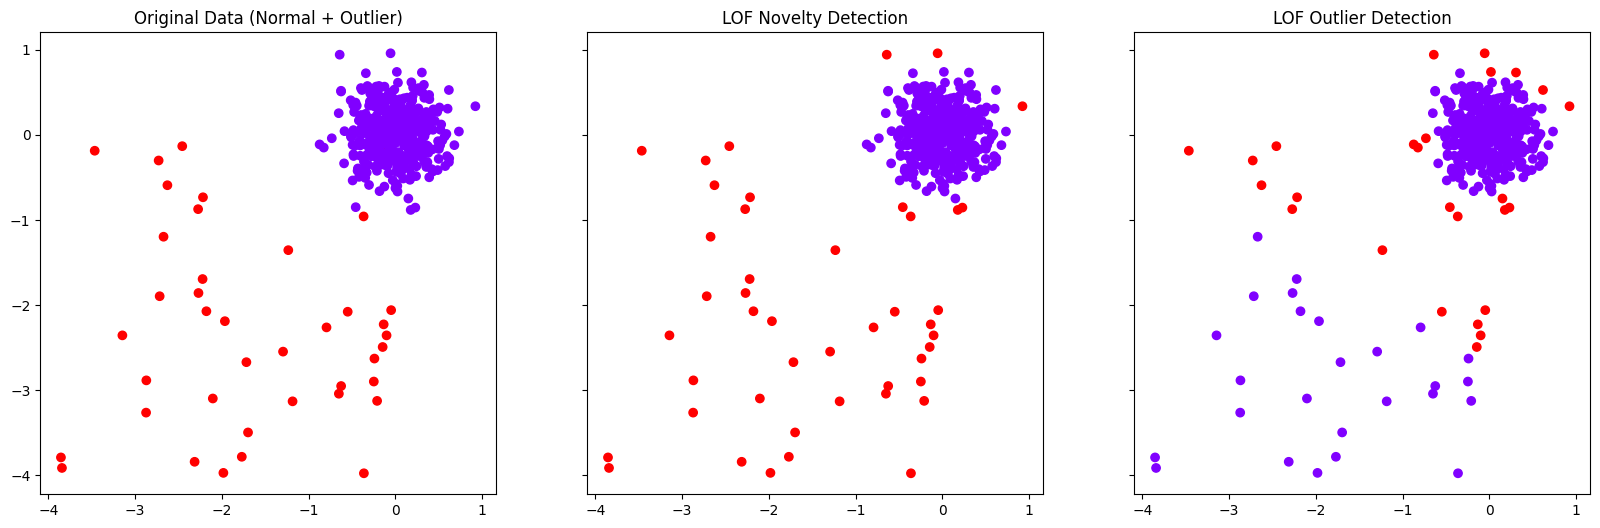

In [107]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, sharey=True, figsize=(20, 6))
ax0.set_title('Original Data (Normal + Outlier)')
ax0.scatter(df_test['feature_1'], df_test['feature_2'], c=df_test['y_test'], cmap='rainbow')
ax1.set_title('LOF Novelty Detection')
ax1.scatter(df_test['feature_1'], df_test['feature_2'], c=df_test['prediction_novelty'], cmap='rainbow')
ax2.set_title('LOF Outlier Detection')
ax2.scatter(df_test['feature_1'], df_test['feature_2'], c=df_test['prediction_outlier'], cmap='rainbow')